# Keywords Spotting

It is one of the most successful examples of TinyML: it has to operate with ultra low power efficiency, run continuously and to be performed on-device.

Typically, when we are dealing with machines that have a full conversation with you, there are large and power hungry automatic speech recognition models. Keyword spotting is not one of those. It falls in the realm of overall speech recognition, but it is a critical front-end in order to wake a more complex model that is sitting behind the scenes.

<img src="./images/01.png" width="500">


When we say "Ok, Google" or "Alexa" you are wake-up the machine that then performs the full automatic speech recognition. In this particular scenario, we have a microphone that is continuously listening (only for the keyword, it is s not constantly recording). W are only thinking about one microphone, but in reality we have billions of keywords to be recognized on a regular day. Imagine if every single one  were actually being processed up in the cloud. This is not possible.

<img src="./images/03.png" width="600">

We don't need all these devices and their keywords to goes on the cloud, instead what we really want  is to come up with an architecture that allows us to provide that sort of keyword spotting capability
such a way that it scales billions of users. So we have to somehow figure out how to be able to run that keyword spotting task on a efficient local embedded device.

Then, if the keyword is detected locally and if the local model is confident enough that it is really a keyword, the command we say after, for example "show me the calendar", is managed by the full speech recognition system usually on to the cloud, where there is speech-to-text converting the words that we say into text, which are then used by the machine in order to figure something out and then be able to come back to us and then do text-to-speech where the machine speaks back to us. 

<img src="./images/02.png" width="600">

The part after the keyword spotting requires to do natural language processing because we need to understand what exactly what we are trying to ask, ant is can be a rather complicated process. But all the computation starts with the recoggnition of the keyword.

The key thing that keyword spotting really enables is that by running the keyword spotting application directly at the end point, near the microphone on an embedded device we're effectively **acting as a filter**, liminting the amount of data that is actually going up to the cloud effectively improving the overall system efficiency.

<img src="./images/04.png" width="600">

We can consider some of the challenges and constraints that we have in design an effective keyword spotting device:
- **Latency**: we need to provide a result quickly. Our brain can only focus on things for about 100/200 milliseconds, after that it automatically switches off and goes on to doing other things. So, the **responsiveness** of the system is crucial in order to provide a quality of experience that meets that expectation.
- **Bandwidth**: we want to minimize the amount of data movement. In any computing system, we have data and compute, it's the data movement that it is really costly, computing is actually cheap. So we want to minimize that data movement, and we don't want to send every single word captured by the device all the way up into the cloud where we have the datacenter to process that data, and then bring it back. Because it's not only slow, it is also very power consuming in moving that data. The more local we keep the data, the better it is from a battery perspective.
- **Accuracy**: the device is continuously listening to us, and we want it to show a feedback only when it's actually heard the keyword at the right time. We don't want false positives and neither we want false negatives. So accuracy is extremely critical.
- **Personalization**: the device is simply listening to sounds, and it is trying to find interesting patterns that happen to resemble a word that might match the keyword. Our sound can sometimes be similar as some sort of background sound. So we need to assure that the devide is able to only
respond to the user voice and not any background noise that might seemingly look like that. We can push personalization to an extreme: we might want the device to unlock only when it hears we
say the keyword and no others. In that case, the model will learn not only the keyword but also how to recognize that it's you that are talking.
- **Privacy**: when data is going up to the cloud, there is a remote chance that them  get compromised. So security and privacy is something that we got to protect.
- **Battery**: embedded devices are operating with battery so we have to do things with extreme efficiency.
- **Memory**: embedded devices are very constrained, which means we have to be extremely efficient during training in order to procude model really small.

We can consider also the steps of the workflow for building a complete Keyword spotting system:
- **Step 1 Data collection:** we need a dataset aligned to individual words that includes thousands of examples which are representative of real world audio (e.g., including background noise)
- **Step 2: Data Preprocessing**: we need to extract features from the audio signal and classify them using a neural network. To do this we convert analog audio signals collected from microphones into digital signals that we then convert into spectrograms
- **Step 3: Model Design**: in order to deploy the learned model into the embedded device, we need it to be very small
- **Step 4: Training**:  we will train the model using standard training techniques.
- **Step 5: Evaluation**:  we will explore what it means to have an accurate model and why our training/validation/test error may be different from the accuracy experienced by users.

In order to make the training, we will use the [**Speech Commands dataset**](https://arxiv.org/abs/1804.03209) which contains thousands of recordings of short words, such as "yes", "no", "pp", "down", "left", "right", "on", "off", etc. 

In [3]:
import urllib.request
import tarfile
import sys
import tensorflow as tf

if not tf.io.gfile.exists("./data/speech_dataset"):
    remote = "https://storage.googleapis.com/download.tensorflow.org/data/speech_commands_v0.02.tar.gz"
    local = "./data/speech_dataset.tar.gz"

    def progress(count, block_size, total_size):
        sys.stdout.write('\r>> Downloading %s %.1f%%' %('Speech dataset', float(count * block_size) / float(total_size) * 100.0))
        sys.stdout.flush()
    urllib.request.urlretrieve(remote, local, progress)

    tgz = tarfile.open(local)
    tgz.extractall("./data/speech_dataset")
    tgz.close()

First of all, let's step through and understand what exactly is going on when we are collecting an audio
from a sensor like a microphone. All we hear are just sound waves that are vibrating. The microphone is picking up those vibrations and converting them into an electrical signal in the form of voltage distortions that we sampled at a certain rate, for example at 16 KHertz (16,000 samples samples per second). And that data should be fed into the network in some way.

<img src="./images/05.png" width="600">

We need to understand what aspects of the signal we really want to pick up. Let's consider "no" and "yes" words loaded from audio files, where "audio_x" is the audio time series of x and "sr_x" is the sampling rate of x.

In [5]:
import pickle

fid = open('./data/speech_dataset/no/0a2b400e_nohash_0.wav', 'rb')
audio_files = pickle.load(fid)

audio_yes_loud = audio_files['audio_yes_loud']
sr_yes_loud = audio_files['sr_yes_loud']
audio_yes_quiet = audio_files['audio_yes_quiet']
sr_yes_quiet = audio_files['sr_yes_quiet']
audio_no_loud = audio_files['audio_no_loud']
sr_no_loud = audio_files['sr_no_loud']
audio_no_quiet = audio_files['audio_no_quiet']
sr_no_quiet = audio_files['sr_no_quiet']

UnpicklingError: unpickling stack underflow

In [ ]:
from IPython.display import Audio
Audio(audio_yes_loud, rate=sr_yes_quiet)

We can look at a **time domain signal**: x-axis is time and y-axis is the amplitude of that signal. We can observe that we have a wide signal, and the important part is somewhere in the middle of it.

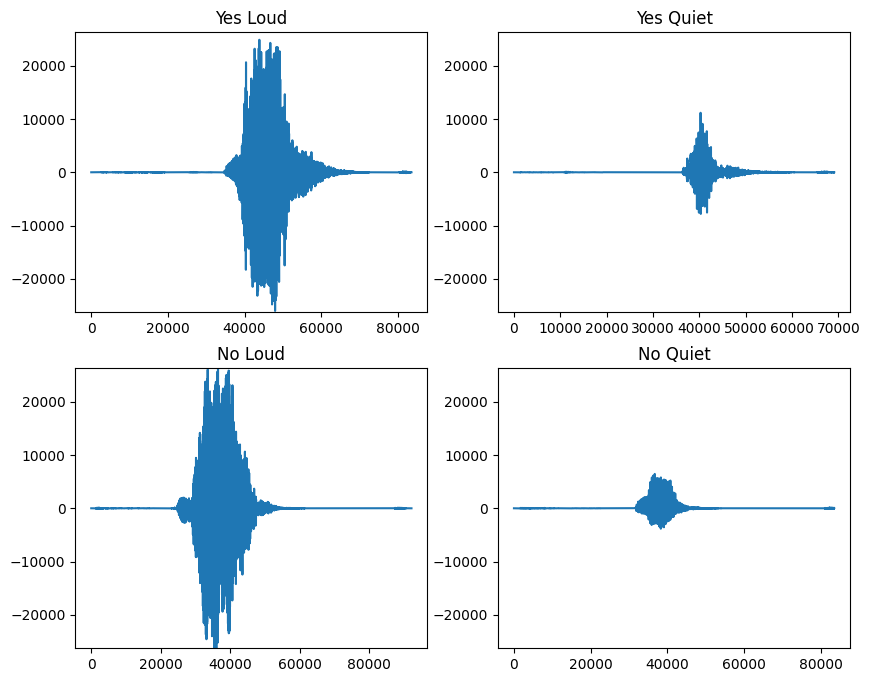

In [ ]:

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)

max_val = max(np.append(np.append(np.append(audio_yes_loud,audio_yes_quiet),audio_no_loud),audio_no_quiet))

ax1.plot(audio_yes_loud)
ax1.set_title("Yes Loud")
ax1.set_ylim(-max_val, max_val)

ax2.plot(audio_yes_quiet)
ax2.set_title("Yes Quiet")
ax2.set_ylim(-max_val, max_val)

ax3.plot(audio_no_loud)
ax3.set_title("No Loud")
ax3.set_ylim(-max_val, max_val)

ax4.plot(audio_no_quiet)
ax4.set_title("No Quiet")
ax4.set_ylim(-max_val, max_val)

fig.set_size_inches(10,8)


We need to keep in mind that when we have a sensor, we have to think about what it's data looks like and how the data feeding into the network needs to look like. We need all of the data coming from the microphone? Do we need to feed all of that data into the network? Or can we try and extract some critical features? The question is, how do we figure out where that "no" is? Doesn't matter whether it's said loudly or quietly, we have to identify it. By just looking at the raw waveforms, we cannot tell the difference.:

<img src="./images/07.png" width="600">

The two waveforms look completely different, even though it's the exact same word being said. The same word can look totally different in its raw format,  this is why **preprocessing the signal** is extremely critical. We want to extract the salient features, because there is some hidden information there that clearly corresponds to "no", but it is not evident in the raw waveforms.

An audio signal is comprised of several single-frequency sound waves. When taking samples of the signal over time, we only capture the resulting amplitudes. The **[Fourier transform]**(https://www.youtube.com/watch?v=spUNpyF58BY) is a mathematical method that allows us to decompose a signal into it’s individual frequencies and the frequency’s amplitude. In other words, it converts the signal from the time domain into the frequency domain. The result is called a spectrum. 

<img src="./images/14.png" width="500">

This is important, because extracting out the critical frequencies, it's like finding the **fingerprint** of the word. Of course, we need to worry about how we can compute this transformation efficiently and the solution is the use of an approximate vesion called **Fast Fourier Transform (FFT)**. 



In [ ]:
ft_audio_yes_loud = np.abs(2*np.fft.fft(audio_yes_loud))
ft_audio_yes_quiet = np.abs(2*np.fft.fft(audio_yes_quiet))
ft_audio_no_loud = np.abs(2*np.fft.fft(audio_no_loud))
ft_audio_no_quiet = np.abs(2*np.fft.fft(audio_no_quiet))

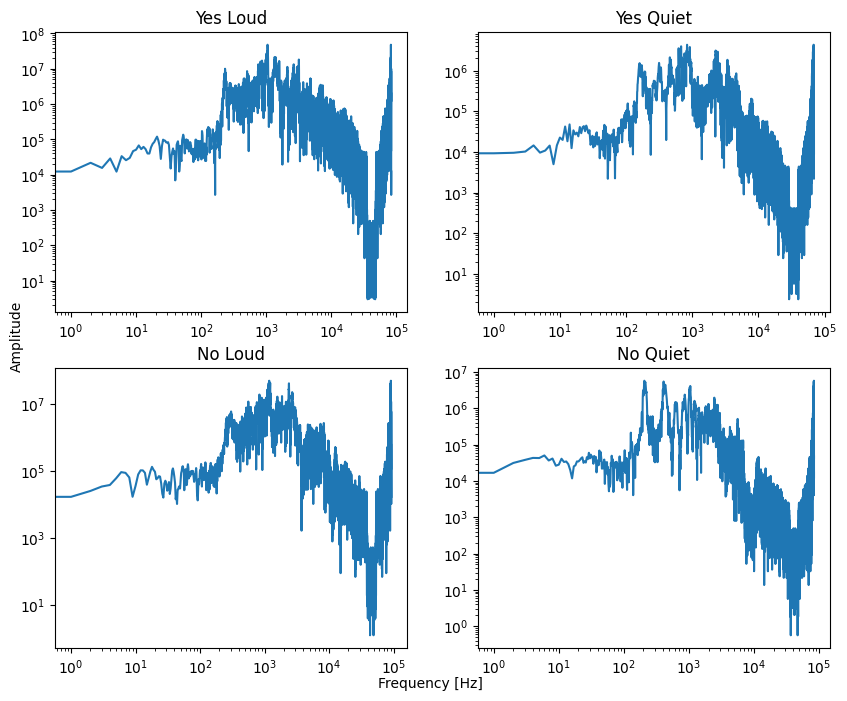

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)

ax1.plot(ft_audio_yes_loud)
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_title("Yes Loud")

ax2.plot(ft_audio_yes_quiet)
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_title("Yes Quiet")

ax3.plot(ft_audio_no_loud)
ax3.set_xscale('log')
ax3.set_yscale('log')
ax3.set_title("No Loud")

ax4.plot(ft_audio_no_quiet)
ax4.set_xscale('log')
ax4.set_yscale('log')
ax4.set_title("No Quiet")

fig.set_size_inches(10,8)
fig.text(0.5, 0.06, 'Frequency [Hz]', ha='center');
fig.text(0.08, 0.5, 'Amplitude', va='center', rotation='vertical');

We have also to notice that when we say "no", it's not a snapshot. It is a set of frequencies that are evolving over time. "No" takes more or less half a second. And this change of the frequencies in time is the pattern that we should extract to capture the unique fingerprint of a world. 

We need a way to represent the spectrum of the signals as it vary over time. The signal is divided in smaller, equally spaced segments (possibly overlapped) of about 25/30 milliseconds (large enough to capture information and the features inside it should remain relatively stationary), where we do the Fourier transform to extract the frequencies along that time domain. 

<img src="./images/16.png" width="600">

We can generate and interesting plot that shows something about what the frequencies  changing over time in their strength, which is called a **spectrogram**. we can think of a spectrogram as a bunch of FFTs stacked on top of each other. It is a way to visually represent a signal amplitude, as it varies over time at different frequencies.

In [ ]:
import tensorflow_io as tfio

spectrogram_yes_loud = tfio.audio.spectrogram(audio_yes_loud/1.0, nfft=2048, window=len(audio_yes_loud), stride=int(sr_yes_loud * 0.008))
spectrogram_yes_quiet = tfio.audio.spectrogram(audio_yes_quiet/1.0, nfft=2048, window=len(audio_yes_quiet), stride=int(sr_yes_quiet * 0.008))
spectrogram_no_loud = tfio.audio.spectrogram(audio_no_loud/1.0, nfft=2048, window=len(audio_no_loud), stride=int(sr_no_loud * 0.008))
spectrogram_no_quiet = tfio.audio.spectrogram(audio_no_quiet/1.0, nfft=2048, window=len(audio_no_quiet), stride=int(sr_no_quiet * 0.008))

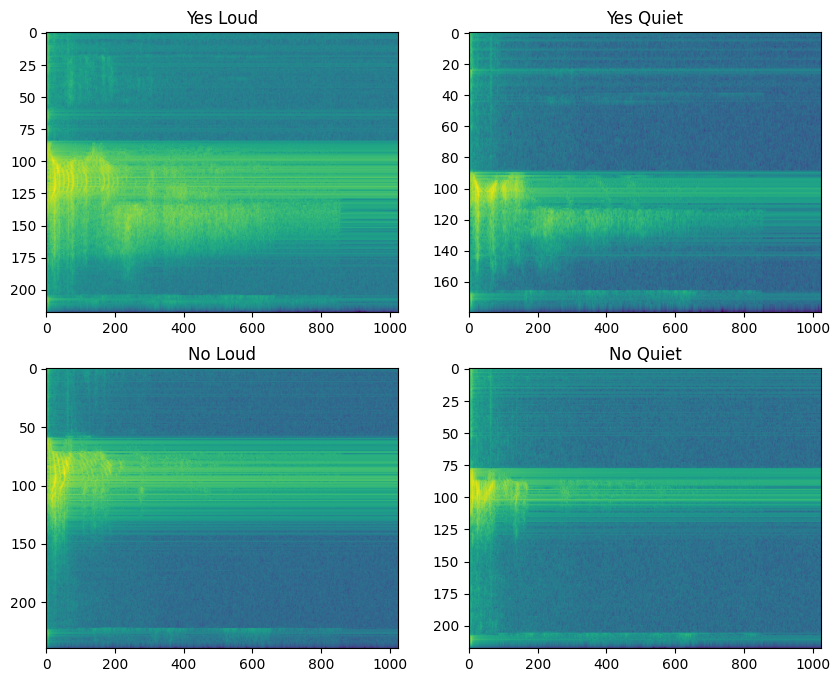

In [ ]:
import tensorflow as tf

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)

ax1.imshow(tf.math.log(spectrogram_yes_loud).numpy(), aspect='auto')
ax1.set_title("Yes Loud")

ax2.imshow(tf.math.log(spectrogram_yes_quiet).numpy(), aspect='auto')
ax2.set_title("Yes Quiet")

ax3.imshow(tf.math.log(spectrogram_no_loud).numpy(), aspect='auto')
ax3.set_title("No Loud")

ax4.imshow(tf.math.log(spectrogram_no_quiet).numpy(), aspect='auto')
ax4.set_title("No Quiet")

fig.set_size_inches(10,8)

We can see that words have a distinctive signature in the spectrograms, which is then allowing us to sort of get a clue that these are not the same word. Moreover, if we look at the "loud" and "quite" versions of the same word, their specttrograms look similar, even their time signals were really different. That's the beauty of converting an audio signal into a frequency domain,

Moreover, studies have shown that humans do not perceive frequencies on a linear scale. We are better at detecting differences in lower frequencies than higher frequencies. The **Mel scale** maps the measured frequency to that we perceived in the context of frequency resolution:

<img src="./images/15.png" width="400">

A [**mel spectrogram**](https://towardsdatascience.com/getting-to-know-the-mel-spectrogram-31bca3e2d9d0) is a spectrogram where the frequencies are converted to the mel scale. We can create a **Mel Filter Bank**, a filter bank with triangular shaped bands arranged on the mel frequency scale, to take advantage of this phenomenon and group together larger clusters of higher frequency signals to provide more useful data to our machine learning algorithm.

<img src="./images/11.png" width="500">

The output of this process is a **Mel Frequency Cepstral Coefficient (MFCC)**.  By extracting these different frequencies, the model gets a chance to look at how the singals are changing over time and to learn how to identifying the keywords.

In [ ]:
import librosa

mfcc_yes_loud = librosa.power_to_db(librosa.feature.melspectrogram(y=np.float32(audio_yes_loud), sr=sr_yes_loud, n_fft=2048, hop_length=512, n_mels=128), ref=np.max)
mfcc_yes_quiet = librosa.power_to_db(librosa.feature.melspectrogram(y=np.float32(audio_yes_quiet), sr=sr_yes_quiet, n_fft=2048, hop_length=512, n_mels=128), ref=np.max)
mfcc_no_loud = librosa.power_to_db(librosa.feature.melspectrogram(y=np.float32(audio_no_loud), sr=sr_no_loud, n_fft=2048, hop_length=512, n_mels=128), ref=np.max)
mfcc_no_quiet = librosa.power_to_db(librosa.feature.melspectrogram(y=np.float32(audio_no_quiet), sr=sr_no_quiet, n_fft=2048, hop_length=512, n_mels=128), ref=np.max)


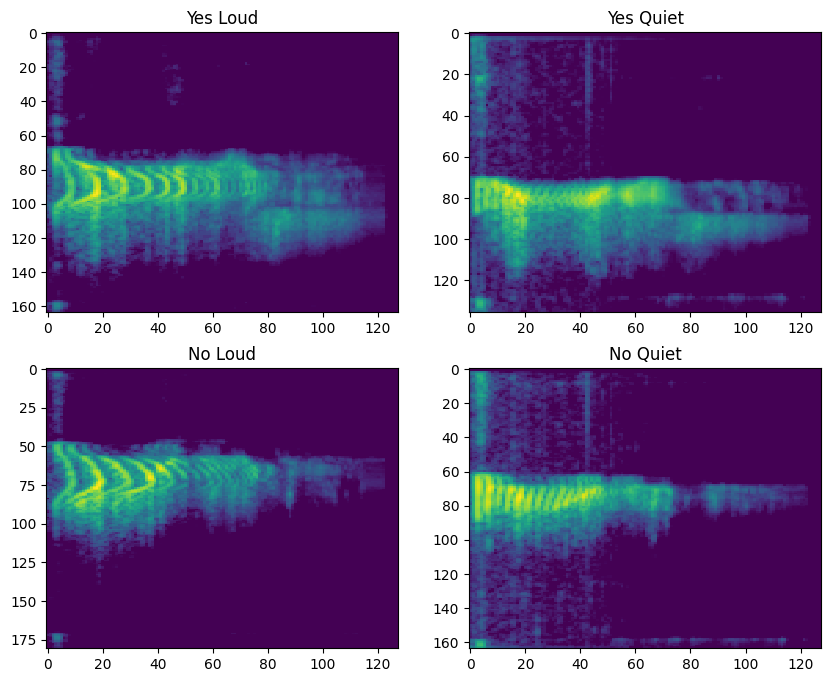

In [ ]:
from matplotlib import cm

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)

ax1.imshow(np.swapaxes(mfcc_yes_loud, 0 ,1), interpolation='nearest', cmap=cm.viridis, origin='lower', aspect='auto')
ax1.set_title("Yes Loud")
ax1.set_ylim(ax1.get_ylim()[::-1])

ax2.imshow(np.swapaxes(mfcc_yes_quiet, 0 ,1), interpolation='nearest', cmap=cm.viridis, origin='lower', aspect='auto')
ax2.set_title("Yes Quiet")
ax2.set_ylim(ax2.get_ylim()[::-1])

ax3.imshow(np.swapaxes(mfcc_no_loud, 0 ,1), interpolation='nearest', cmap=cm.viridis, origin='lower', aspect='auto')
ax3.set_title("No Loud")
ax3.set_ylim(ax3.get_ylim()[::-1])

ax4.imshow(np.swapaxes(mfcc_no_quiet, 0 ,1), interpolation='nearest', cmap=cm.viridis, origin='lower', aspect='auto')
ax4.set_title("No Quiet")
ax4.set_ylim(ax4.get_ylim()[::-1])

fig.set_size_inches(10,8)

We can do a more **feature engineering**.  For instance, we can clean the signal, normalize it in order to helps the neural network learn.

<img src="./images/13.png" width="700">

In general, we need to preprocess signals that are coming out of sensors. We do not pick raw data and feed it straight into the model. And doing the preprocessing, we are looking for critical features that we want to extract out so that it's easier for the model to learn to pick those features up
as we train the network.

There are many different ways we can solve this learning problem and it is likely that large neural networks would perform well without the preprocessing. However, for the case of TinyML this preprocessing is vital and drastically improves the final model performance without taking up a lot of memory or latency!

We need to designing the model. We are dealing with images (the spectrogram),so we might use a convolutional neural network. Can we just reuse the network we have already used to classify MNIST digits? 

<img src="./images/17.png" width="700">

However, before we use it, we need to consider **the constraints of the embedded device**. Our real device (an Arduino Nano Sense) has only got 256 KB of RAM and one MB of storage. And if we  look at the model it's abount 6,8 KB! The model won't be  loaded onto the device. We can quantize the network,
however, we end up with a model that's 1,7 KB. It doesn't fit. The key thing is that when we are designing tiny ML applications, they're really domain-specific machine learning tasks.

We can exploit a simplified convolutional model:  a one conv layer for extrating features, followed by a dense layer for doing the classification.

<img src="./images/20.png" width="700">

It's by design simple because all you are doing is trying to detect very simple words. We are not doing a full speech recognition task. It's about simplicity. Certainly we can improve this network quite a bit, but it is a good starting point. It has about 16,652 parameters and if we look at the size it's about 70 KB, and quantize about 17 KB. It is very, very small.

We create a dataset with words "yes" and "no" and two more classes, "silence" and "unknown", which will help the model to learn to better pick out target words from noise. 

In [ ]:
wanted_words = ["yes", "no"] 

We analyze the dataset folders, figuring out the right label for each file based on the name of the subdirectory it belongs to, and uses a stable hash to assign it to a data set partition. We want to keep files in the same training, validation, or testing sets even if new ones are added over time. This makes it less likely that testing samples will accidentally be reused in training when long runs are restarted, for example. To keep this stability, a hash of the filename is taken and used to determine which set it should belong to. This determination only depends on the name and the set proportions, so it won't change as other files are added.

In [ ]:
from speech_dataset2 import SpeechDataset

dataset = SpeechDataset(words=wanted_words, silence_percentage=50, unknown_percentage=50)
batch_size = 128
train_data = dataset.training_dataset().batch(batch_size).prefetch(1)
valid_data = dataset.validation_dataset().batch(batch_size).prefetch(1)

Let's take a look at an example input:

In [ ]:
Audio('./data/speech_dataset/no/1bb574f9_nohash_0.wav')

The SpeechDataset class converts audio files into spectrogram inputs. To see what the data looks like, let's visualise a few input spectrograms and labels (different every time you run):

2023-05-29 17:58:08.740334: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_9' with dtype float and shape [6390371]
	 [[{{node Placeholder/_9}}]]
2023-05-29 17:58:08.740983: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [1648]
	 [[{{node Placeholder/_0}}]]


Word: _unknown_


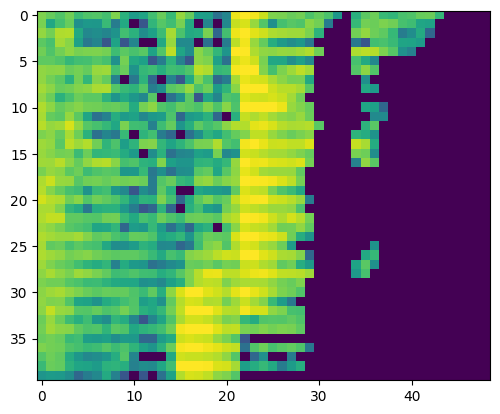

2023-05-29 17:58:09.174769: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


Word: no


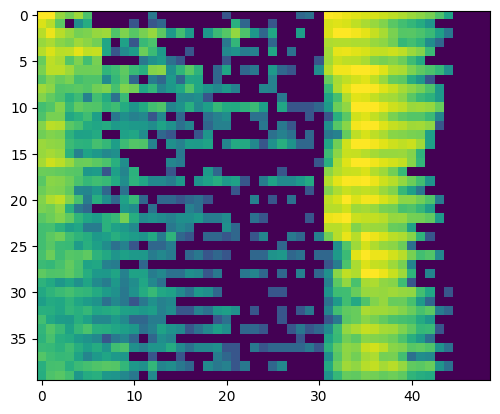

In [ ]:
import matplotlib.pyplot as plt
for spectrogram, label in dataset.testing_dataset().shuffle(50).take(2):
    spectrogram, label = spectrogram.numpy(), label.numpy()  # convert from Tensors to ndarrays
    print("Word:", dataset.look_up_word(label))
    plt.imshow(spectrogram[:, :, 0].T / 26.0, vmin=0.0, vmax=1.0)  # normalise back to 0.0 to 1.0
    plt.show()

Now, we set up and train a small model using

In [ ]:
input_shape = dataset.sample_shape()
num_classes = dataset.label_count()

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(8, (10, 8), strides=(2, 2), padding="SAME", activation="relu", input_shape=input_shape),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(num_classes),
    tf.keras.layers.Activation("softmax")
])

model.summary()

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 25, 20, 8)         648       
                                                                 
 flatten_1 (Flatten)         (None, 4000)              0         
                                                                 
 dropout_1 (Dropout)         (None, 4000)              0         
                                                                 
 dense_1 (Dense)             (None, 4)                 16004     
                                                                 
 activation_1 (Activation)   (None, 4)                 0         
                                                                 
Total params: 16,652
Trainable params: 16,652
Non-trainable params: 0
_________________________________________________________________


In [ ]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [ ]:
model.fit(train_data, validation_data=valid_data, epochs=100) 

Epoch 1/100
100/100 [==============================] - 7s 65ms/step - loss: 1.2906 - accuracy: 0.5984 - val_loss: 0.5681 - val_accuracy: 0.7934
Epoch 2/100
100/100 [==============================] - 7s 66ms/step - loss: 0.5902 - accuracy: 0.7830 - val_loss: 0.4599 - val_accuracy: 0.8326
Epoch 3/100
100/100 [==============================] - 7s 65ms/step - loss: 0.4914 - accuracy: 0.8201 - val_loss: 0.4418 - val_accuracy: 0.8457
Epoch 4/100
100/100 [==============================] - 7s 65ms/step - loss: 0.4557 - accuracy: 0.8338 - val_loss: 0.4131 - val_accuracy: 0.8519
Epoch 5/100
100/100 [==============================] - 7s 66ms/step - loss: 0.4301 - accuracy: 0.8429 - val_loss: 0.3664 - val_accuracy: 0.8724
Epoch 6/100
100/100 [==============================] - 7s 68ms/step - loss: 0.3982 - accuracy: 0.8559 - val_loss: 0.3467 - val_accuracy: 0.8724
Epoch 7/100
100/100 [==============================] - 7s 69ms/step - loss: 0.3865 - accuracy: 0.8574 - val_loss: 0.3635 - val_accuracy:

Training can take a while, depending on the complexity of THE model and the number of epochs. Now let's check its performance on the test dataset and save the trained model.

In [ ]:
test_data = dataset.testing_dataset().batch(64)
model.evaluate(test_data)

 1/26 [>.............................] - ETA: 3s - loss: 0.1192 - accuracy: 0.9531

2023-05-29 20:27:16.132323: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [1648]
	 [[{{node Placeholder/_0}}]]
2023-05-29 20:27:16.132653: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_9' with dtype float and shape [6390371]
	 [[{{node Placeholder/_9}}]]


26/26 [==============================] - 1s 18ms/step - loss: 0.2680 - accuracy: 0.9126


[0.26801642775535583, 0.9126213788986206]

We convert the model in TFLite without quantization and save it.

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
float_tflite_model = converter.convert()

2023-05-29 20:29:07.598039: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,4000]
	 [[{{node inputs}}]]
2023-05-29 20:29:07.720046: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,4000]
	 [[{{node inputs}}]]


INFO:tensorflow:Assets written to: /var/folders/np/rkxq5s9x6lzdnx_24x0j3jx80000gn/T/tmp2kjjr5ea/assets


INFO:tensorflow:Assets written to: /var/folders/np/rkxq5s9x6lzdnx_24x0j3jx80000gn/T/tmp2kjjr5ea/assets
2023-05-29 20:29:10.193209: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:364] Ignored output_format.
2023-05-29 20:29:10.193226: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:367] Ignored drop_control_dependency.
2023-05-29 20:29:10.193416: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: /var/folders/np/rkxq5s9x6lzdnx_24x0j3jx80000gn/T/tmp2kjjr5ea
2023-05-29 20:29:10.194697: I tensorflow/cc/saved_model/reader.cc:89] Reading meta graph with tags { serve }
2023-05-29 20:29:10.194709: I tensorflow/cc/saved_model/reader.cc:130] Reading SavedModel debug info (if present) from: /var/folders/np/rkxq5s9x6lzdnx_24x0j3jx80000gn/T/tmp2kjjr5ea
2023-05-29 20:29:10.200118: I tensorflow/cc/saved_model/loader.cc:231] Restoring SavedModel bundle.
2023-05-29 20:29:10.238206: I tensorflow/cc/saved_model/loader.cc:215] Running initialization

In [ ]:
with open('./models/float_tflite_model.tflite', 'wb') as f:
  f.write(float_tflite_model)

In [ ]:
print("TFlite model in KB:", os.path.getsize('./models/float_tflite_model.tflite') / float(2**10))

TFlite model in KB: 67.140625


In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT] 
tflite_model = converter.convert()

2023-05-29 20:29:22.681892: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,4000]
	 [[{{node inputs}}]]
2023-05-29 20:29:22.805850: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,4000]
	 [[{{node inputs}}]]


INFO:tensorflow:Assets written to: /var/folders/np/rkxq5s9x6lzdnx_24x0j3jx80000gn/T/tmpnxfgnr2s/assets


INFO:tensorflow:Assets written to: /var/folders/np/rkxq5s9x6lzdnx_24x0j3jx80000gn/T/tmpnxfgnr2s/assets
2023-05-29 20:29:25.341086: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:364] Ignored output_format.
2023-05-29 20:29:25.341102: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:367] Ignored drop_control_dependency.
2023-05-29 20:29:25.341288: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: /var/folders/np/rkxq5s9x6lzdnx_24x0j3jx80000gn/T/tmpnxfgnr2s
2023-05-29 20:29:25.342562: I tensorflow/cc/saved_model/reader.cc:89] Reading meta graph with tags { serve }
2023-05-29 20:29:25.342575: I tensorflow/cc/saved_model/reader.cc:130] Reading SavedModel debug info (if present) from: /var/folders/np/rkxq5s9x6lzdnx_24x0j3jx80000gn/T/tmpnxfgnr2s
2023-05-29 20:29:25.347096: I tensorflow/cc/saved_model/loader.cc:231] Restoring SavedModel bundle.
2023-05-29 20:29:25.384868: I tensorflow/cc/saved_model/loader.cc:215] Running initialization

In [ ]:
with open('./models/quantized_tflite_model.tflite', 'wb') as f:
    f.write(tflite_model)

print("TFlite optimized model in KB:", os.path.getsize('./models/quantized_tflite_model.tflite') / float(2**10))

TFlite optimized model in KB: 20.3515625


After training the model, we're at the stage where we want to understand how to assess the keyword spotting model. Obviously, we can consider the accuracy to see how well it perform. However, in the TinyML context latency, power consumption, storage/memory requirements are extremely critical aspects.

In [ ]:
import numpy as np

def evaluate(model_file, dataset):
    # Load the quantised TFLite model
    interpreter = tf.lite.Interpreter(model_path=model_file)
    interpreter.allocate_tensors()
    input_info = interpreter.get_input_details()[0]
    input_index = input_info["index"]
    scale, offset = input_info["quantization"]
    output_index = interpreter.get_output_details()[0]["index"]

    # Push the dataset through the model and compute accuracy
    accuracy = tf.keras.metrics.SparseCategoricalAccuracy()
    test_data = dataset.batch(1).as_numpy_iterator()

    for x, y_true in test_data:
        interpreter.set_tensor(input_index, x)
        interpreter.invoke()
        y_pred = interpreter.get_tensor(output_index)
        accuracy.update_state(y_true, y_pred)
    return accuracy.result()

accuracy = evaluate("./models/quantized_tflite_model.tflite", dataset.testing_dataset())
print(f"accuracy (quantised model) = {accuracy:.4f}")

We have to consider false positive and false negative, because often those error lead to a lot of user frustration and dissatisfaction and the quality of experience is extremelly important. In particular we can use the ROC curve (Receiver Operating Curve): a graphical representation that allows to understand how a binary classifier is actually going to behave:

<img src="./images/21.png" width="400">

We want to decrease the number of false accepts we have on the x-axis and at the same time, we want to decrease the number of false rejects, howevre there is a very tight coupling between the two.
If we make the system more resilient to the false accept possibility, we also increase the chances
that the device might not actually wake up when it needs to wake up. We need to find a critical position where we want to sit at with a right balance between false accepts and false rejects, and that's called the **operating point**.

Every keyword spotting architecture relies on this point and we need to tune it. However, depending
on different environment conditions, the best operating point might have to shift.
For instance, Siri on iPhone has the capability to **dynamically adjust** that operating point, in order to increase or decrease sensitivity. When the phone is in our pocket it has to be a bit more sensitive, when it is near a TV or in a noisy living room it to be actually less sensitive. And this is why typically a smartphone ask to fine tune the voice assistant once we start it up ("Can you say, "OK Google" five times?).

When we build an application, there is more than just raw accuracy. The efficiency is also very important. **Latency** is extremely critical, because the device should respond quickly, otherwise it defeats the whole purpose. We might have a high accuracy, but we don't care if it takes three seconds
to wake up. That's extremely important for end user satisfaction: the responsiveness is key. 

It has to **run efficiently** because we don't  want to use too much battery.

The other aspect is **memory efficiency**, becouse we are on resource constrained embedded device. First, there is the application code that is getting the data from the sensor and doing the pre-processing. Then we have the inference engine (like the TF Lite Interpreter). Then we have our model. On top of that, we also have some amount of memory needed for hosting all the dynamic variables and the audio buffer, where we are storing the auidio signals that are coming in:

<img src="./images/22.png" width="400">

There are other things that affect the **overall quality of experience (QoE)**. For instance, we have used the speech command dataset, however it can have biases: it might only work for a certain type of accent, if the people who contributed to that dataset were from a particular region. If we have those clusters in our data (no matter how much pre-processing we do), it is going to result in a network that only recognizes those kinds of sounds. Of course, a similar point apply to backgrounds (the sound in a room is bouncing off of the walls in a way that can have a certain effect) and others details. We need to conider also noise: inject noise in the samples ensure to create a dataset able to produce a **resilient neural network**.

Let's take a real world example. For instance, how this is actually done on a smartphone. It has a lot of capabilities, but it also has TinyML in it. The phone is constantly able to recognize the wake-up word throughout the day. Turning the microphone on and doing the signal processing actually
costs energy that drains the battery. So the system is designedto be efficient. We have some mechanism, the detector, that wakes the phone up, that allows you to get more capability that's up in the cloud.

<img src="./images/23.png" width="600">

For instance, when we say "hey Siri, play my favorite song". The keyword "hey Siri" activates the phone, then it has to recognize that there's something else we have said ("play my favorite songs"), then the system in the cloud should figure out what our favorite songs are and finally start playing things. But how can we enable this to be continuous, always on ML? We can use a **cascading architecture**: an always on low-power (milliwats) processor module physically on the phone, but completelly separate from the main application processor (1/3 watts), is constantly listening to the audio coming in. It runs continuously the small TinyML model. If it detects something interesting, then wakes up the powerful processor, which is much more accurate, and can figure out with greater confidence, if it should really be invoking the cloud or not. The cascading architecture is a coupling of the different models working together on different physical subsystems.